
# 1. The LASSO and Boosting for Regression

In [465]:
pip install scikit-learn==0.18 --force-reinstall


The following command must be run outside of the IPython shell:

    $ pip install scikit-learn==0.18 --force-reinstall

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


1. a. Downloaded the dataset. Divided into train and test set. 

In [4]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as FF
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.cross_validation import train_test_split


df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data', header= None)
df=df.iloc[:,5:128]
print(df)

#print(train_set)

C:\Users\Krishna\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



       5     6     7     8     9     10    11    12    13    14   ...    118  \
0     0.19  0.33  0.02  0.90  0.12  0.17  0.34  0.47  0.29  0.32  ...   0.12   
1     0.00  0.16  0.12  0.74  0.45  0.07  0.26  0.59  0.35  0.27  ...   0.02   
2     0.00  0.42  0.49  0.56  0.17  0.04  0.39  0.47  0.28  0.32  ...   0.01   
3     0.04  0.77  1.00  0.08  0.12  0.10  0.51  0.50  0.34  0.21  ...   0.02   
4     0.01  0.55  0.02  0.95  0.09  0.05  0.38  0.38  0.23  0.36  ...   0.04   
5     0.02  0.28  0.06  0.54  1.00  0.25  0.31  0.48  0.27  0.37  ...   0.01   
6     0.01  0.39  0.00  0.98  0.06  0.02  0.30  0.37  0.23  0.60  ...   0.05   
7     0.01  0.74  0.03  0.46  0.20  1.00  0.52  0.55  0.36  0.35  ...   0.01   
8     0.03  0.34  0.20  0.84  0.02  0.00  0.38  0.45  0.28  0.48  ...   0.04   
9     0.01  0.40  0.06  0.87  0.30  0.03  0.90  0.82  0.80  0.39  ...   0.00   
10    0.13  0.71  0.15  0.07  1.00  0.41  0.40  0.52  0.35  0.33  ...   0.02   
11    0.02  0.46  0.08  0.91  0.07  0.10

(b)The data set has missing values. Use a data imputation technique to deal with
the missing values in the data set.

In [5]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#from sklearn.impute import SimpleImputer

'''
df_ohe= pd.DataFrame()

values= np.array(df[3])
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
df_ohe_temp=pd.DataFrame(integer_encoded)
df_ohe_temp.columns= [3]
df_ohe=pd.concat([df_ohe, df_ohe_temp],axis=1, sort= False)
ohe= pd.concat([df_ohe,df.loc[:, df.columns != 3]], axis=1, sort=False)
ohe = ohe.replace('?', np.NaN)
#print(ohe)

'''

df = df.replace('?', np.NaN)
imputer = Imputer( missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True)
imputed_set=pd.DataFrame(imputer.fit_transform(df))
#print(imputed_set)

train_set= imputed_set[0:1495]
test_set= imputed_set[1496:]
#print(train_set)

print(test_set)



       0     1     2     3     4     5     6     7     8     9    ...    113  \
1496  0.00  0.55  0.13  0.78  0.15  0.36  0.48  0.53  0.30  0.10  ...   0.01   
1497  0.00  0.52  0.04  0.59  0.05  0.62  0.84  0.78  0.75  0.43  ...   0.01   
1498  0.04  0.51  0.07  0.92  0.09  0.03  0.38  0.47  0.27  0.35  ...   0.06   
1499  0.03  0.59  0.20  0.75  0.19  0.10  0.38  0.62  0.35  0.11  ...   0.03   
1500  0.01  0.48  0.02  0.77  0.84  0.05  0.37  0.26  0.20  0.50  ...   0.01   
1501  0.05  0.64  0.03  0.84  0.21  0.33  0.45  0.50  0.30  0.24  ...   0.02   
1502  0.27  0.37  0.22  0.67  0.42  0.07  0.39  0.50  0.33  0.42  ...   0.14   
1503  0.00  0.24  0.01  0.95  0.01  0.01  0.22  0.23  0.13  1.00  ...   0.06   
1504  0.02  0.32  0.20  0.81  0.08  0.05  0.28  0.43  0.26  0.59  ...   0.02   
1505  0.01  0.38  0.35  0.71  0.04  0.01  0.39  0.46  0.31  0.49  ...   0.09   
1506  0.00  0.33  0.52  0.59  0.01  0.01  0.34  0.43  0.29  0.65  ...   0.01   
1507  0.03  0.45  0.04  0.82  0.08  0.19

(c) Plot a correlation matrix for the features in the data set.


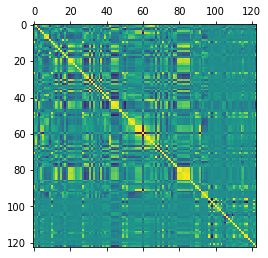

In [20]:
import matplotlib.pyplot as plt
col=train_set.columns
#print(col)
train_set.corr()

plt.matshow(train_set.corr())

(d) Calculate the Coefficient of Variation CV for each feature

In [17]:
CV_dict= {}
mean=0
var=0
for column in train_set:
    
    mean= np.average(train_set[[column]].values)
    var= np.var(train_set[[column]].values)
    CV= var/mean
    CV_dict[column]= CV
del CV_dict[122]
print(CV_dict)

{0: 0.29195237113592371, 1: 0.058413149511927769, 2: 0.36693506461196129, 3: 0.082033915755958975, 4: 0.28374019286801666, 5: 0.37648381772143147, 6: 0.057535705117354327, 7: 0.04173269087451191, 8: 0.083904010856859848, 9: 0.072972384889276015, 10: 0.26845722333628042, 11: 0.28674334457001621, 12: 0.12579927443127215, 13: 0.059730753306206058, 14: 0.1430658149913426, 15: 0.066127970190254612, 16: 0.061844037234491646, 17: 0.16120268679004121, 18: 0.057047364811557227, 19: 0.10951405926496594, 20: 0.10909374562600894, 21: 0.099450909961656744, 22: 0.10479728395449607, 23: 0.13556581202471571, 24: 0.12320542915565028, 25: 0.12763947597060729, 26: 0.090635185634190041, 27: 0.31172680476672249, 28: 0.17513552256834794, 29: 0.14815044842551095, 30: 0.11035586925673485, 31: 0.12708854982350712, 32: 0.11588654404360742, 33: 0.061167500003160097, 34: 0.10569661044932965, 35: 0.071603768665197867, 36: 0.10554678953261296, 37: 0.082449337966444741, 38: 0.07373575297355757, 39: 0.071081669188601

(e) Pick b
√
128c features with highest CV , and make scatter plots and box plots for
them. Can you draw conclusions about significance of those features, just by the
scatter plots?


Scatter plots of features with the output. The x axis is the column number corresponding  to the selected features 


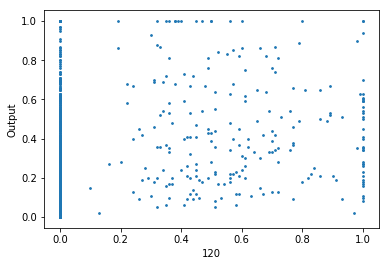

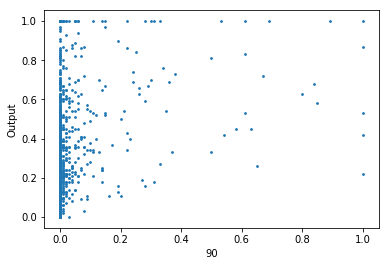

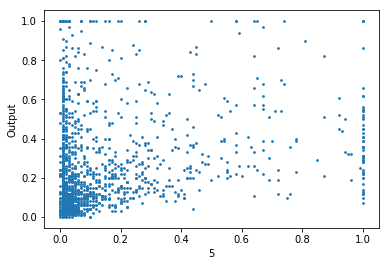

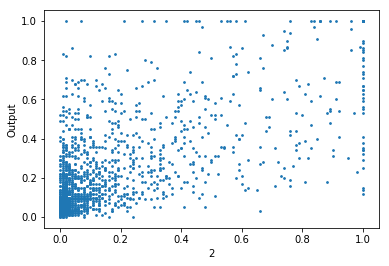

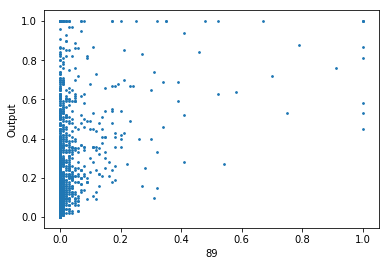

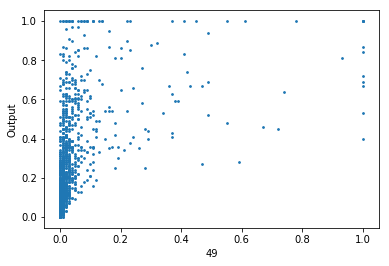

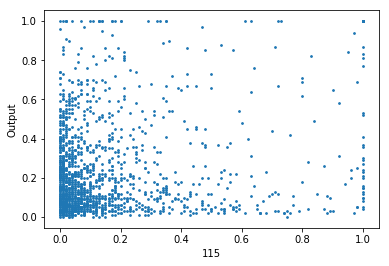

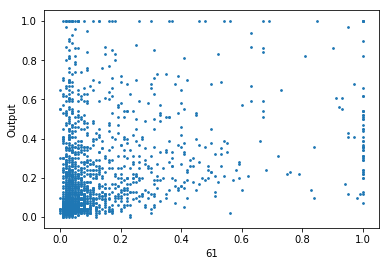

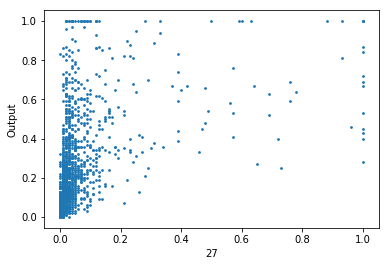

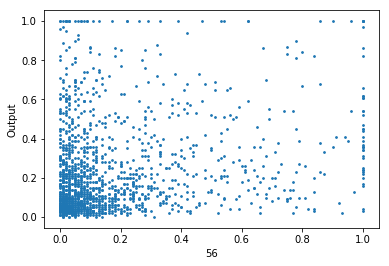

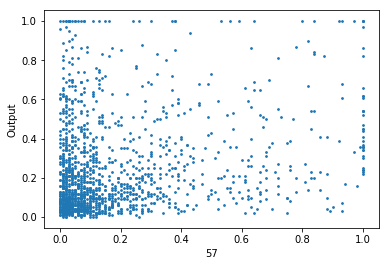

In [29]:
print("Scatter plots of features with the output. The x axis is the column number corresponding  to the selected features ")
import operator
num= math.floor(math.sqrt(128))
filtered_CV = sorted(CV_dict.items() , key=operator.itemgetter(1), reverse=True)[:num]

filtered_CV_dict=pd.DataFrame(filtered_CV)
#print(filtered_CV_dict[0].values.tolist()[1])
for i in range(0,len(filtered_CV_dict[0].values.tolist())):
    plt.figure()
    plt.scatter(x=train_set[filtered_CV_dict[0].values.tolist()[i]], y=train_set[122], s=3)
    plt.xlabel(filtered_CV_dict[0].values.tolist()[i])
    plt.ylabel("Output")
    plt.show()

We can't infer anything from the plots where the data points are scattered randomly (like the first plot). In some plots like the 90 v/s output plot and 49 v/s output, the data points are seen to be concentrated in one side indicating class imabalance. 

Box plots of the 11 features


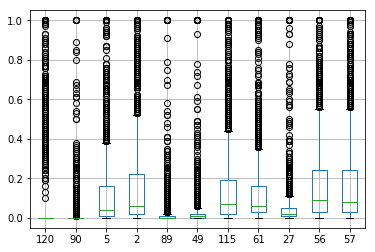

In [30]:
#print(filtered_CV_dict[0].values.tolist())
print("Box plots of the 11 features")
train_set_boxplot= train_set[filtered_CV_dict[0].values.tolist()]
#print(train_set_boxplot)
train_set_boxplot.boxplot(column=filtered_CV_dict[0].values.tolist())




(f) Fit a linear model using least squares to the training set and report the test error.

In [541]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

regr = linear_model.LinearRegression()

regr.fit(train_set.iloc[:,0:122].values, train_set[122])

y_pred= regr.predict(test_set.iloc[:,0:122])

print("Test error: ", mean_squared_error(test_set[122], y_pred))



Test error:  0.7913112944336634


(g) Fit a ridge regression model on the training set, with λ chosen by cross-validation.  Report the test error obtained.

In [32]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV
m=0
a=0

alpha=[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]


clf_r= RidgeCV(alphas=[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20])
clf_r.fit(train_set.iloc[:,0:121],train_set[122]) 
y_pred_ridger= clf_r.predict(test_set.iloc[:,0:121])
print("Lambda value: ", clf_r.alpha_)
print("Test error: ",mean_squared_error(test_set[122], y_pred_ridger))



Lambda value:  1.0
Test error:  0.0177763417762


(h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with normalized features. Report the test error for both cases and compare them.


In [58]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.linear_model import LassoCV

import warnings
warnings.filterwarnings('ignore')
##check e power
#alpha=[0,0.1, 0.2, 0.3, 0.5, 0.7, 1]
alpha=np.logspace(-4,-0.5,30)
clf = LassoCV(alphas=alpha, random_state= 42)

clf.fit(train_set.iloc[:,0:122],train_set[122])

#print(clf.alpha_)
lass_pred= pd.DataFrame(clf.predict(test_set.iloc[:,0:122]))
print("Test error")
print(mean_squared_error(test_set[122], lass_pred))
print("Variables selected by the model" )
print(np.count_nonzero(clf.coef_))
print("List of variables selected by model (column numbers): ",np.nonzero(clf.coef_))


X=train_set.iloc[:,0:122]
y= train_set[122]
X_t=test_set.iloc[:,0:122]
##Normalization 

normalized_X = preprocessing.normalize(X)
#normalized_df= pd.DataFrame(normalized_X)

normalized_test = preprocessing.normalize(X_t)
#normalized_df_test= pd.DataFrame(normalized_test)
##Repeated with normallized features

clf_n = LassoCV(alphas=alpha, random_state= 42)

clf_n.fit(normalized_X,y)
lass_pred_n= pd.DataFrame(clf_n.predict(normalized_test))
#test_error=r2_score(normalized_df_y[[122]], lass_pred)
print("\n \n After performing normalization.. ")
print("Test error")
print(mean_squared_error(test_set[122], lass_pred_n))

print("Variables selected by the model" )
print(np.count_nonzero(clf_n.coef_))
print("List of variables selected by model (column numbers): ",np.nonzero(clf_n.coef_))


Test error
0.0175953876632
Variables selected by the model
46
List of variables selected by model (column numbers):  (array([  2,   7,  11,  13,  14,  15,  17,  18,  22,  23,  24,  25,  26,
        28,  33,  38,  44,  45,  46,  48,  50,  53,  59,  67,  68,  69,
        71,  72,  74,  75,  76,  78,  82,  85,  86,  88,  90,  91,  94,
       101, 102, 114, 115, 118, 119, 120], dtype=int64),)

 
 After performing normalization.. 
Test error
0.0175315418564
Variables selected by the model
33
List of variables selected by model (column numbers):  (array([  2,   7,  11,  15,  17,  18,  23,  24,  25,  28,  38,  44,  45,
        48,  50,  59,  68,  69,  71,  72,  74,  75,  86,  88,  89,  90,
        91,  94, 101, 102, 114, 119, 120], dtype=int64),)


Comparison:
The test error before and after normalization does not show much of a difference. However, the error value is very slightly less after normalizing. Normalization causes lesser number of features to selected. (# of features selected before normalizing is 46 and # of features after normalizing is 33). 

(i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.


In [338]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import linear_model
m=0

X=train_set.iloc[:,0:121]
y= train_set[122]

pca=PCA()
X_reduced = pca.fit_transform(preprocessing.scale(X))

n = len(X_reduced)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

regr = linear_model.LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)
M=0
m=mse[0]
#print(mse)
# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 122):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    if score<m:
        m=score
        M=i
    
#print(mse)
print("M chosen from CV", M)


X_reduced_test = pca.transform(preprocessing.scale(test_set.iloc[:,0:121]))[:,:M+1]

# Train regression model on training data 
regr1 = linear_model.LinearRegression()
regr1.fit(X_reduced[:,:M+1], y)

# Prediction with test data
pred = regr1.predict(X_reduced_test)

print("Test error: ", mean_squared_error(test_set[122], pred))

M chosen from CV 96
Test error:  0.018848062617918118


(j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost to fit the model tree. Determine α (the regularization term) using cross-validation.

In [59]:
import xgboost as xgb
dtrain = xgb.DMatrix(train_set.iloc[:,0:122], train_set[122])
#params = {"alphas":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
alpha = [0.0, 1.0, 5.0, 10.0]
a=100
al=0
for i in alpha:
    
    gbm = xgb.XGBClassifier(reg_alpha = i)
    params = gbm.get_xgb_params()
    #xgb_cv = xgb.cv(params, dtrain)
    #print(xgb_cv)
    cvresult = xgb.cv(params, dtrain, metrics=['auc'])
    gbm.fit(train_set.iloc[:,0:122], train_set[122])
    #print(xgb_cv.alpha_)
    pred_xgb = gbm.predict(test_set.iloc[:,0:122])
    test_error_xgb = mean_squared_error(test_set[122], pred_xgb)
    if test_error_xgb<a:
        a=test_error_xgb
        al=i
print("Test error :",a)
print("Alpha value determined using cross validation: ", al)

Test error : 0.0329232931727
Alpha value determined using cross validation:  1.0


# 2. Tree-Based Methods

2. a. Downloaded the data set. 

In [6]:
from sklearn.preprocessing import label_binarize
 


df2 = pd.read_csv('C:/Users/Krishna/Desktop/usc/ML INF/ass3/aps_failure_training_set.csv', skiprows=20 )
df2_test= pd.read_csv('C:/Users/Krishna/Desktop/usc/ML INF/ass3/aps_failure_test_set.csv', skiprows=20 )

df2 = df2.replace('na', np.NaN)
df2_test = df2_test.replace('na', np.NaN)
col= df2.columns
y_res= df2['class']
y_res_neg_pos= y_res
df2=df2.iloc[:,1:]

y_res_test= df2_test['class']
y_res_neg_pos_test= y_res_test
df2_test=df2_test.iloc[:,1:]




y_res = label_binarize(pd.DataFrame(y_res), classes=['neg', 'pos'])
y_train2=pd.DataFrame(y_res)



y_res_test = label_binarize(pd.DataFrame(y_res_test), classes=['neg', 'pos'])
y_train2_test=pd.DataFrame(y_res_test)
#print(y_train)

#print(col)
imputer2 = Imputer( missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True)
imputed_set2=pd.DataFrame(imputer2.fit_transform(df2))
imputed_set2.columns=col.values[1:len(col)]
print(imputed_set2)

imputer2_test = Imputer( missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True)
imputed_set2_test=pd.DataFrame(imputer2_test.fit_transform(df2_test))
print(imputed_set2_test)

         aa_000    ab_000        ac_000         ad_000  ae_000  af_000  \
0       76698.0  0.713189  2.130706e+09     280.000000     0.0     0.0   
1       33058.0  0.713189  0.000000e+00  190620.639314     0.0     0.0   
2       41040.0  0.713189  2.280000e+02     100.000000     0.0     0.0   
3          12.0  0.000000  7.000000e+01      66.000000     0.0    10.0   
4       60874.0  0.713189  1.368000e+03     458.000000     0.0     0.0   
5       38312.0  0.713189  2.130706e+09     218.000000     0.0     0.0   
6          14.0  0.000000  6.000000e+00  190620.639314     0.0     0.0   
7      102960.0  0.713189  2.130706e+09     116.000000     0.0     0.0   
8       78696.0  0.713189  0.000000e+00  190620.639314     0.0     0.0   
9      153204.0  0.000000  1.820000e+02  190620.639314     0.0     0.0   
10      39196.0  0.713189  2.040000e+02     170.000000     0.0     0.0   
11      45912.0  0.713189  0.000000e+00     454.000000     0.0     0.0   
12       2104.0  0.713189  3.600000e+0

             0         1             2            3         4         5    \
0           60.0  0.000000  2.000000e+01    12.000000  0.000000   0.00000   
1           82.0  0.000000  6.800000e+01    40.000000  0.000000   0.00000   
2        66002.0  2.000000  2.120000e+02   112.000000  0.000000   0.00000   
3        59816.0  0.772065  1.010000e+03   936.000000  0.000000   0.00000   
4         1814.0  0.772065  1.560000e+02   140.000000  0.000000   0.00000   
5          174.0  0.772065  2.600000e+01    24.000000  0.000000   0.00000   
6        40202.0  0.772065  6.400000e+02   606.000000  0.000000   0.00000   
7       120278.0  0.772065  2.130706e+09   256.000000  0.000000   0.00000   
8        14592.0  0.000000  2.130706e+09   162.000000  0.000000   0.00000   
9        28338.0  0.772065  2.130706e+09   238.000000  0.000000   0.00000   
10       30758.0  0.772065  4.500000e+02   402.000000  0.000000   0.00000   
11       40358.0  0.772065  1.672000e+03  1378.000000  0.000000   0.00000   

(b) Data Preparation
i. Research what types of techniques are usually used for dealing with data with
missing values. Pick at least one of them and apply it to this data in the
next steps.


Data imputation and deletion are the 2 major techniques used for dealing with data with missing vlaues. Here, the number of incomplete data points is large. Hence, ignoring them is not a good idea. So I have performed data imputation to fix missing data issue. 

ii. For each of the 170 features, calculate the coefficient of variation CV 

In [93]:
CV_dict2= {}
mean=0
var=0
for column in imputed_set2:
    
    mean= np.average(imputed_set2[[column]].values)
    var= np.var(imputed_set2[[column]].values)
    CV= var/mean
    CV_dict2[column]= CV
print(CV_dict2)

{'aa_000': 356434.04984930449, 'ab_000': 3.8664488615384611, 'ac_000': 1676046902.6857786, 'ad_000': 6442860221.3676882, 'ae_000': 3667.4004926464345, 'af_000': 3832.0183442655834, 'ag_000': 1870950.026147611, 'ag_001': 1185353.5510554104, 'ag_002': 2596280.6605773754, 'ag_003': 6476210.4588132054, 'ag_004': 12752506.604502205, 'ag_005': 9496242.464442946, 'ag_006': 9115663.0401580837, 'ag_007': 4008707.9055445064, 'ag_008': 1347325.6379173228, 'ag_009': 5564592.0178327542, 'ah_000': 9575935.3561804891, 'ai_000': 2925566.1169131864, 'aj_000': 2194217.4754848727, 'ak_000': 5440219.1462244736, 'al_000': 4868970.901668271, 'am_0': 7654494.7888235999, 'an_000': 17347158.806232132, 'ao_000': 15337032.225823933, 'ap_000': 9397256.7880885731, 'aq_000': 3567222.3002852593, 'ar_000': 58.357952146721956, 'as_000': 946437.51857263991, 'at_000': 2791326.8195450543, 'au_000': 1071226.5894363595, 'av_000': 37328.453258535425, 'ax_000': 5628.1190709877092, 'ay_000': 16726109.562183194, 'ay_001': 2780

iii. Plot a correlation matrix for your features using pandas or any other tool

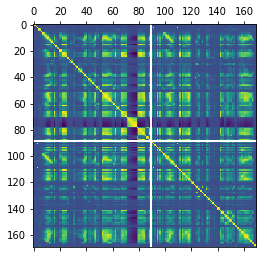

In [34]:
import matplotlib.pyplot as plt
col=imputed_set2.columns
#print(col)
imputed_set2.corr()

plt.matshow(imputed_set2.corr())

iv. Pick b√170c features with highest CV , and make scatter plots and box plots
for them, similar to those on p. 129 of ISLR. Can you draw conclusions about
significance of those features, just by the scatter plots? This does not mean
that you will only use those features in the following questions. We picked
them only for visualization.

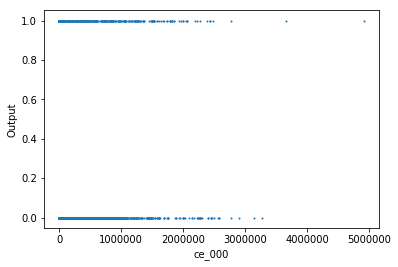

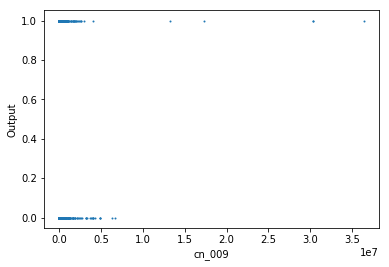

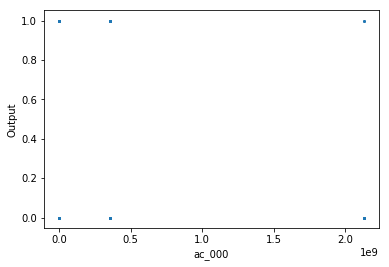

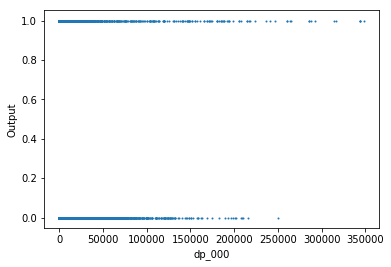

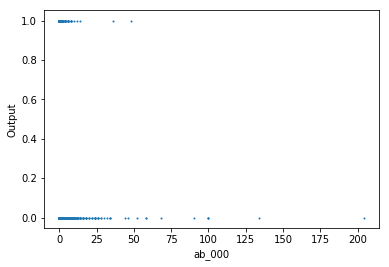

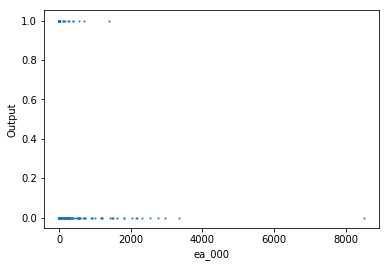

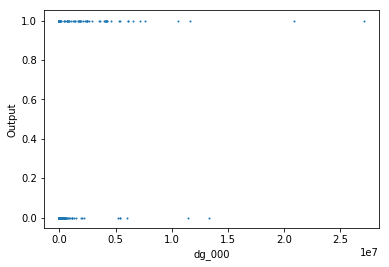

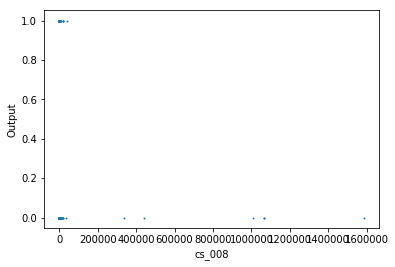

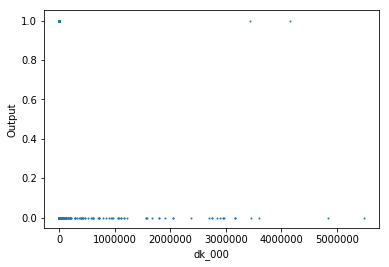

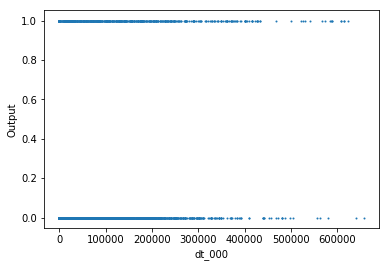

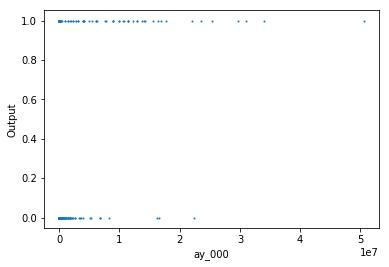

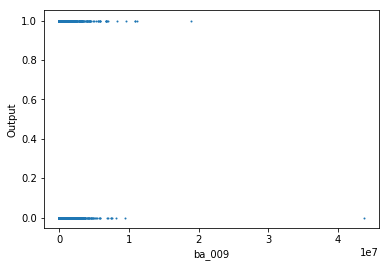

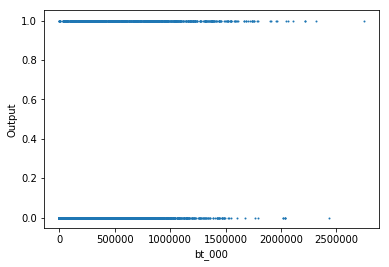

In [80]:
#print(train_set[filtered_CV_dict[0].values.tolist()[1]])
import operator
import seaborn as sns
import matplotlib.pyplot as plt



num= math.floor(math.sqrt(170))
filtered_CV2 = sorted(CV_dict2.items() , key=operator.itemgetter(1), reverse=True)[:num]

filtered_CV_dict2=pd.DataFrame(filtered_CV2)
#print(imputed_set2)
for i in range(0,len(filtered_CV_dict2[0].values.tolist())):
    plt.figure()
    plt.scatter(x=imputed_set2[filtered_CV_dict2[0].values.tolist()[i]], y=pd.DataFrame(y_res), s=1)
    plt.xlabel(filtered_CV_dict2[0].values.tolist()[i])
    plt.ylabel("Output")
    plt.show()

We can not infer much from these plots other than the fact that there is class imabalnce in the data set. Here the  number of negative classes is clearly bigger  than the number of positive classes. 

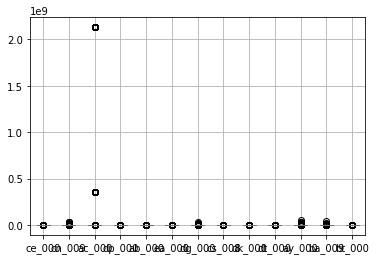

In [94]:
#print(filtered_CV_dict2[0].values.tolist())

train_set_boxplot2= imputed_set2[filtered_CV_dict2[0].values.tolist()]
#print(train_set_boxplot)
train_set_boxplot2.boxplot(column=filtered_CV_dict2[0].values.tolist())




v. Determine the number of positive and negative data. Is this data set imbalanced?

Number of positive data: 1000
Number of negative data: 59000
Yes, this data is imbalanced since number of negative class is very high compared to the number of positive class. 

2 (c) Train a random forest to classify the data set. Do NOT compensate for class
imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and
misclassification for training and test sets and report them (You may use pROC
package). Calculate Out of Bag error estimate for your random forset and compare
it to the test error.

Confusion matrix for train
[[59000     0]
 [   48   952]]
ROC curve for train
AUC:  0.976


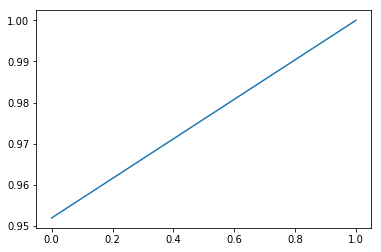

Confusion matrix for test
[[15609    16]
 [  126   249]]
ROC curve for test
AUC:  0.831488


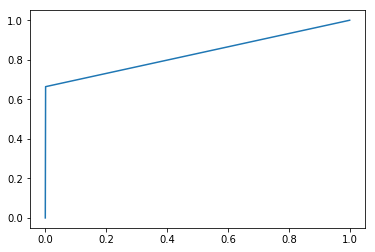

In [62]:
## Random Forest
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(oob_score=True, random_state=42,class_weight=None)
clf.fit(imputed_set2,y_res)
y_pred_random_forest= pd.DataFrame(clf.predict(imputed_set2_test))

clf1 = RandomForestClassifier(oob_score=True, random_state=42,class_weight=None)
clf1.fit(imputed_set2,y_res)
y_pred_random_forest_train= pd.DataFrame(clf1.predict(imputed_set2))


con_mat_test = confusion_matrix(y_res, y_pred_random_forest_train, [0, 1])
print("Confusion matrix for train")
print(con_mat_test)
logit_roc_auc = roc_auc_score(y_res, y_pred_random_forest_train)
fpr, tpr, thresholds = roc_curve(y_res, y_pred_random_forest_train)
print("ROC curve for train")
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
print("AUC: ",logit_roc_auc )
plt.show()


con_mat_test = confusion_matrix(y_train2_test, y_pred_random_forest, [0, 1])
print("Confusion matrix for test")
print(con_mat_test)
logit_roc_auc = roc_auc_score(y_train2_test, y_pred_random_forest)
fpr, tpr, thresholds = roc_curve(y_train2_test, y_pred_random_forest)
print("ROC curve for test")
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
print("AUC: ",logit_roc_auc )
plt.show()
#print(y_pred_random_forest)



In [472]:
y_pred_random_forest= pd.DataFrame(clf.predict(imputed_set2_test))
print("OOB error", 1 - clf.oob_score_)
print("Misclassification of train", ((1-accuracy_score(y_res, y_pred_random_forest_train))))
print("Misclassification of test ", ((1-accuracy_score(y_train2_test, y_pred_random_forest))))

OOB error 0.008583333333333387
Misclassification of train 0.0008000000000000229
Misclassification of test  0.008874999999999966


Comparison of OOB and test error: 
The OOB error is very close to our obtainded test error. 

2 d.  Research how class imbalance is addressed in random forests. Compensate for
class imbalance in your random forest and repeat 2c. Compare the results with
those of 2c.


Confusion matrix
[[59000     0]
 [   55   945]]
ROC Curve for train data
AUC:  0.9725


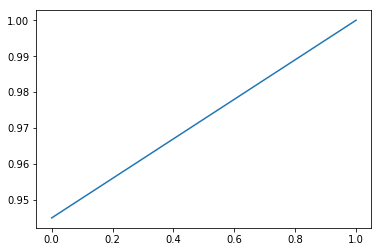

Confusion matrix
[[15609    16]
 [  193   182]]
ROC Curve for test data
AUC:  0.742154666667


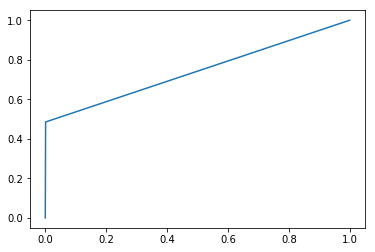

OOB error 0.0109833333333
Misclassification of train 0.000916666666667
Misclassification of test  0.0130625


In [65]:
## Random Forest
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

clf2 = RandomForestClassifier(oob_score=True, random_state=42,class_weight="balanced")
clf2.fit(imputed_set2,y_res)
y_pred_random_forest_n= pd.DataFrame(clf2.predict(imputed_set2_test))

clf3 = RandomForestClassifier(oob_score=True, random_state=42,class_weight="balanced")
clf3.fit(imputed_set2,y_res)
y_pred_random_forest_train_n= pd.DataFrame(clf3.predict(imputed_set2))


con_mat_test = confusion_matrix(y_res, y_pred_random_forest_train_n, [0, 1])
print("Confusion matrix")
print(con_mat_test)
logit_roc_auc = roc_auc_score(y_res, y_pred_random_forest_train_n)
fpr, tpr, thresholds = roc_curve(y_res, y_pred_random_forest_train_n)
print("ROC Curve for train data")
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
print("AUC: ",logit_roc_auc )
plt.show()



con_mat_test_n = confusion_matrix(y_train2_test, y_pred_random_forest_n, [0, 1])
print("Confusion matrix")
print(con_mat_test_n)
logit_roc_auc = roc_auc_score(y_train2_test, y_pred_random_forest_n)
fpr, tpr, thresholds = roc_curve(y_train2_test, y_pred_random_forest_n)
print("ROC Curve for test data")
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
print("AUC: ",logit_roc_auc )
plt.show()
#print(y_pred_random_forest)

print("OOB error", 1 - clf2.oob_score_)
print("Misclassification of train", ((1-accuracy_score(y_res, y_pred_random_forest_train_n))))
print("Misclassification of test ", ((1-accuracy_score(y_train2_test, y_pred_random_forest_n))))


In [76]:
!pip install arff

  Running setup.py bdist_wheel for arff: started
  Running setup.py bdist_wheel for arff: finished with status 'done'
  Stored in directory: C:\Users\Krishna\AppData\Local\pip\Cache\wheels\04\d0\70\2c73afedd3ac25c6085b528742c69b9587cbdfa67e5194583b
Successfully built arff


distributed 1.21.8 requires msgpack, which is not installed.


2 e. Train Logistic Model Trees for the APS data set without compensation for class
imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error.
Report the Confusion Matrix, ROC, and AUC for training and test sets.

In [7]:
imputed_set2_=imputed_set2[0:5000]
y_res_neg_pos_=y_res_neg_pos[0:5000]

imputed_set2_test_=imputed_set2_test[0:5000]
y_res_neg_pos_test_=y_res_neg_pos_test[0:5000]

input_weka= pd.concat([imputed_set2_,y_res_neg_pos_], axis=1, sort=False)
output_weka= pd.concat([imputed_set2_test_,y_res_neg_pos_test_], axis=1, sort=False)
print(input_weka.shape)
print(output_weka.shape)

(5000, 171)
(5000, 171)


NOTE: Since the processing of 60000 datapoints is computationally intensive, I have taken a subset of the test and train data set. My train data set contains 5000 data points and test dataset contains 1000 data points. 

INFO:weka.core.jvm:JVM already running, call jvm.stop() first


For train data

Correctly Classified Instances        9915               99.15   %
Incorrectly Classified Instances        85                0.85   %
Kappa statistic                          0.7242
Mean absolute error                      0.0132
Root mean squared error                  0.0844
Relative absolute error                 37.5524 %
Root relative squared error             63.8295 %
Total Number of Instances            10000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.998    0.360    0.994      0.998    0.996      0.731    0.971     0.998     neg
                 0.640    0.002    0.844      0.640    0.728      0.731    0.971     0.771     pos
Weighted Avg.    0.992    0.353    0.991      0.992    0.991      0.731    0.971     0.994     

AOC: 0.9710441361859069
For test data

Correctly Classified Instances        4944               98.88   %
Incorrectly Classif

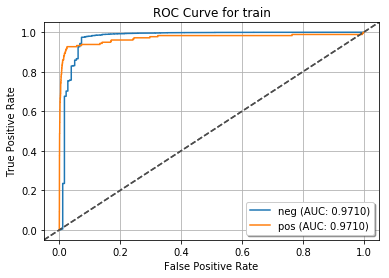

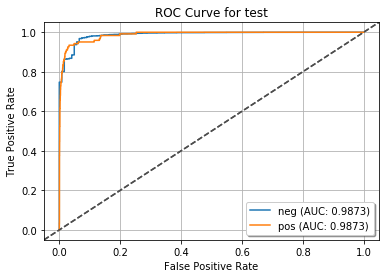

In [9]:
from weka.core.converters import Loader
import weka.core.jvm as jvm
import weka.plot.classifiers as plot_cls
jvm.start(packages=True)
import weka.core.converters as converters
from weka.classifiers import Evaluation
from weka.core.classes import Random
from weka.classifiers import Classifier
from weka.plot.classifiers import plot_roc
import arff


#print(input_weka)
input_weka.to_csv("./inp.csv", index= False)
output_weka.to_csv("./op.csv", index= False)

data = converters.load_any_file("./inp.csv")
data.class_is_last()

data_o = converters.load_any_file("./op.csv")
data_o.class_is_last()

print("For train data")
cls = Classifier(classname="weka.classifiers.trees.LMT")
cls.build_classifier(data)
evaluation = Evaluation(data)
evl = evaluation.test_model(cls, data)
evaluation.crossvalidate_model(cls, data, 10, Random(42))
print(evaluation.summary())
print(evaluation.class_details())
print("AOC: " + str(evaluation.area_under_roc(1)))
plot_cls.plot_roc(evaluation, title="ROC Curve for train",class_index=range(0, data.class_attribute.num_values), wait=False)
#plot_roc.show()


print("For test data")
cls1 = Classifier(classname="weka.classifiers.trees.LMT")
cls1.build_classifier(data)
evaluation1 = Evaluation(data_o)
evl1 = evaluation1.test_model(cls1, data_o)
#print(evl)
print(evaluation1.summary())
print(evaluation1.class_details())
print("AOC: " + str(evaluation1.area_under_roc(1)))
plot_cls.plot_roc(evaluation1, title="ROC Curve for test",class_index=range(0, data.class_attribute.num_values), wait=False)
#plot_roc.show()



2 f. Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your
data to compensate for class imbalance. Train a Logistic Model Tree using the
pre-processed data and repeat 2e.

INFO:weka.core.jvm:JVM already running, call jvm.stop() first


(19644, 171)
For the train data

Correctly Classified Instances        9822               50      %
Incorrectly Classified Instances      9822               50      %
Kappa statistic                          0     
Mean absolute error                      0.5   
Root mean squared error                  0.5   
Relative absolute error                100      %
Root relative squared error            100      %
Total Number of Instances            19644     
Ignored Class Unknown Instances              19644     

AOC: 0.5
For the test data

Correctly Classified Instances        4911               50      %
Incorrectly Classified Instances      4911               50      %
Kappa statistic                          0     
Mean absolute error                      0.5   
Root mean squared error                  0.5   
Relative absolute error                100      %
Root relative squared error             72.4703 %
Total Number of Instances             9822     
Ignored Class Unknown Instance

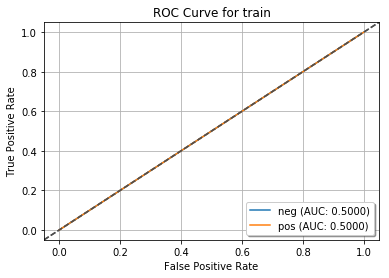

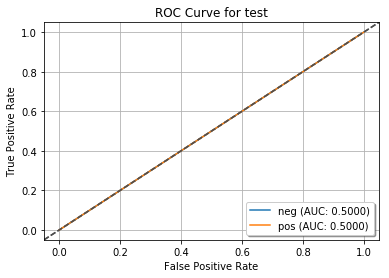

In [11]:
from imblearn.over_sampling import SMOTE
from weka.core.converters import Loader
import weka.core.jvm as jvm
import weka.plot.classifiers as plot_cls
jvm.start(packages=True)
import weka.core.converters as converters
from weka.classifiers import Evaluation
from weka.core.classes import Random
from weka.classifiers import Classifier
from weka.plot.classifiers import plot_roc
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(imputed_set2_.values, y_res_neg_pos_.values)
u=pd.DataFrame(X_res)
v=pd.DataFrame(y_res)
v.columns=["Y"]

smote_input_weka= pd.concat([u,v], axis=0, sort=False)
print(smote_input_weka.shape)

'''
X_res_o, y_res_o = sm.fit_sample(imputed_set2_test_.values, y_res_neg_pos_test_.values)
u_o=pd.DataFrame(X_res_o)
v_o=u=pd.DataFrame(y_res_o)
smote_output_weka= pd.concat([u_o,v_o], axis=1, sort=False)
'''

smote_input_weka.to_csv("./inps.csv",  index= False)
output_weka.to_csv("./op.csv", index= False)

data = converters.load_any_file("./inps.csv")
data.class_is_last()

print("For the train data")
cls = Classifier(classname="weka.classifiers.trees.LMT")
cls.build_classifier(data)
evaluation = Evaluation(data)
evaluation.test_model(cls, data)
evaluation.crossvalidate_model(cls, data, 10, Random(42))
print(evaluation.summary())
#print(evaluation.class_details())
print("AOC: " + str(evaluation.area_under_roc(1)))
plot_cls.plot_roc(evaluation, title="ROC Curve for train",class_index=range(0, data.class_attribute.num_values), wait=False)

print("For the test data")

evaluation1 = Evaluation(data_o)
evaluation1.test_model(cls1, data)
#print(evl)
#evaluation1.test_model(cls1,data)
print(evaluation1.summary())
print(evaluation1.class_details())
print("AOC: " + str(evaluation1.area_under_roc(1)))
plot_cls.plot_roc(evaluation1, title="ROC Curve for test",class_index=range(0, data.class_attribute.num_values), wait=False)


ISLR 6.8.3

a
(iv) Steadily decreases: As the value of s increases from 0, the values of all  β 's increase from 0 to their least square values (we are restricting the βj coefficients less and less). The model is becoming more and more flexible causing a steady decrease in the training RSS

b
(ii) Decrease initially, and then eventually start increasing in a U shape: When s=0, all β s are 0, the model is extremely simple and has a high test RSS. As we increase s, beta s assume non-zero values (we are restricting the βj coefficients less and less) and model starts fitting well on test data and so test RSS decreases. Eventually, as β s approach their full blown OLS values, they start overfitting to the training data, hence increasing test RSS.

(iii) Steadily increase: When s=0, the model effectively predicts a constant and has almost no variance. As we increase s, the models includes more β s and their values start increasing. At this point, the values of β s become highly dependent on training data, thus increasing the variance (the model is becoming more and more flexible).

d
(iv) Steadily decrease: When s=0, the model predicts a constant and thus the prediction is very different from the actual value. Here bias is high. As s increases, more β s become non-zero and thus the model continues to fit training data better. Here we are restricting the βj coefficients less and less. And thus, bias decreases.

e
(v) Remains constant: By definition, irreducible error is model independent and hence irrespective of the choice of s, it remains constant.

ISLR 6.8.5


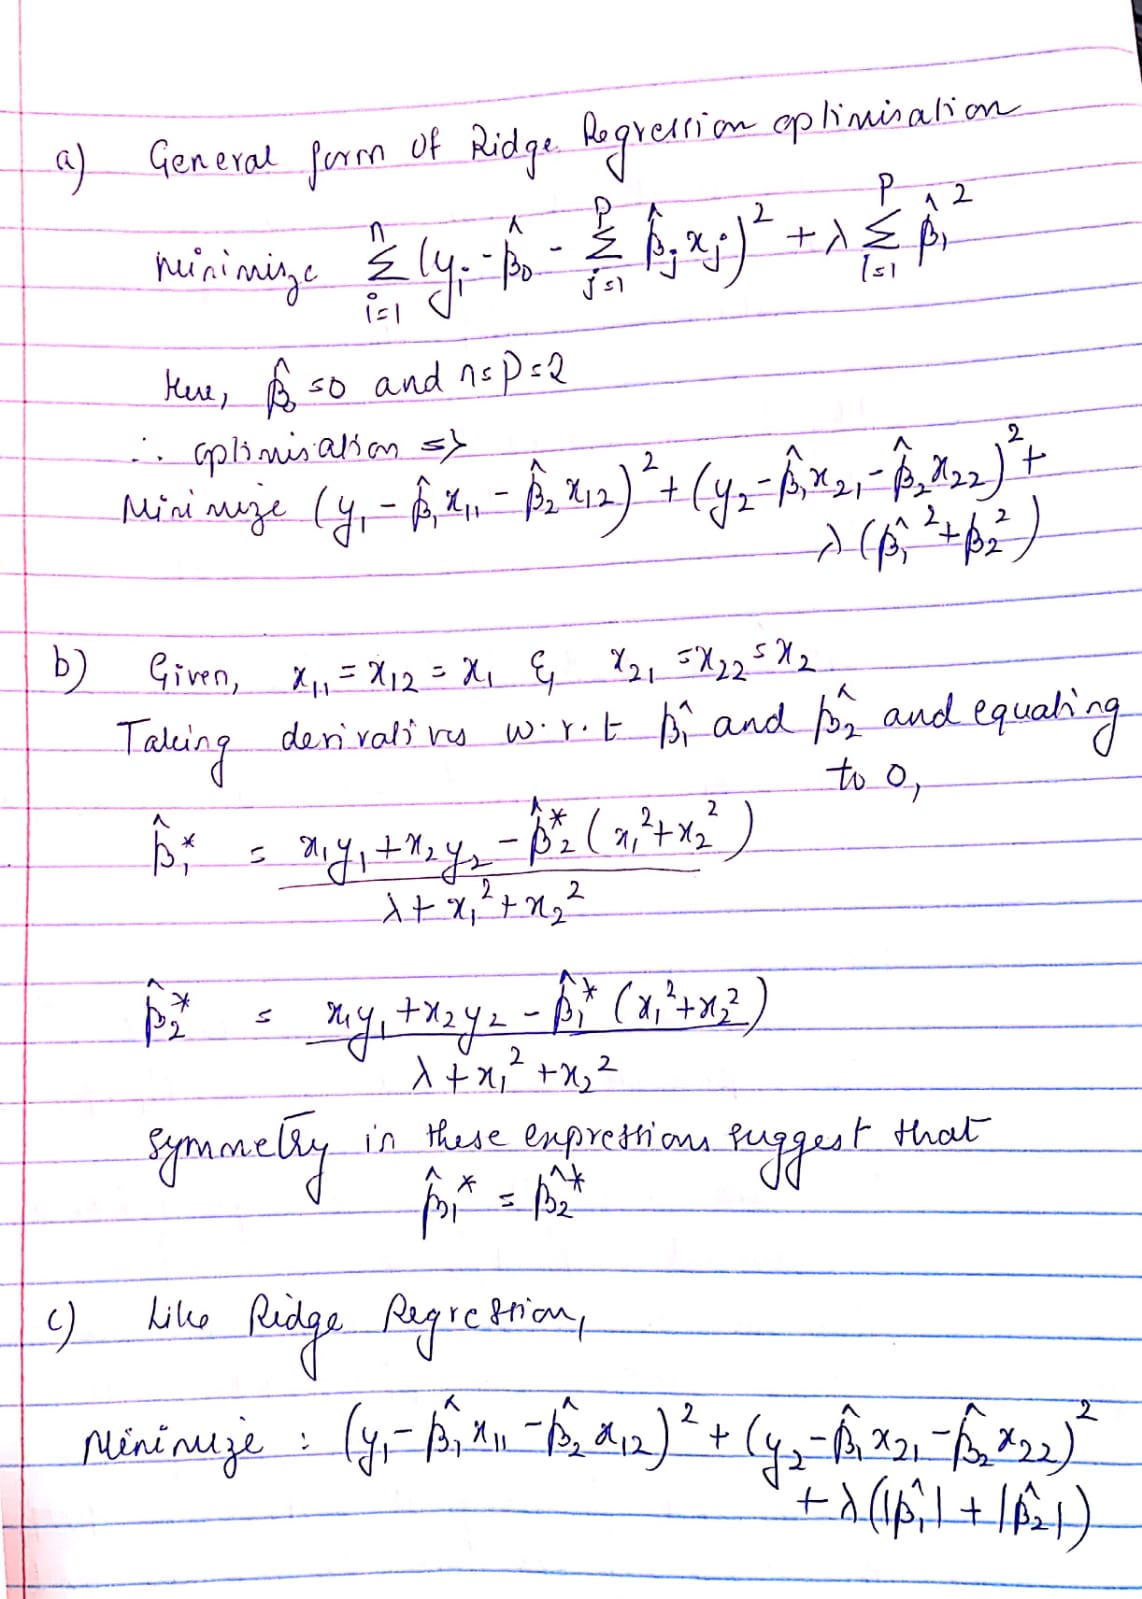

In [39]:
from IPython.display import Image
PATH = "./"
Image(filename = PATH +"1.jpeg", width=500, height=500)


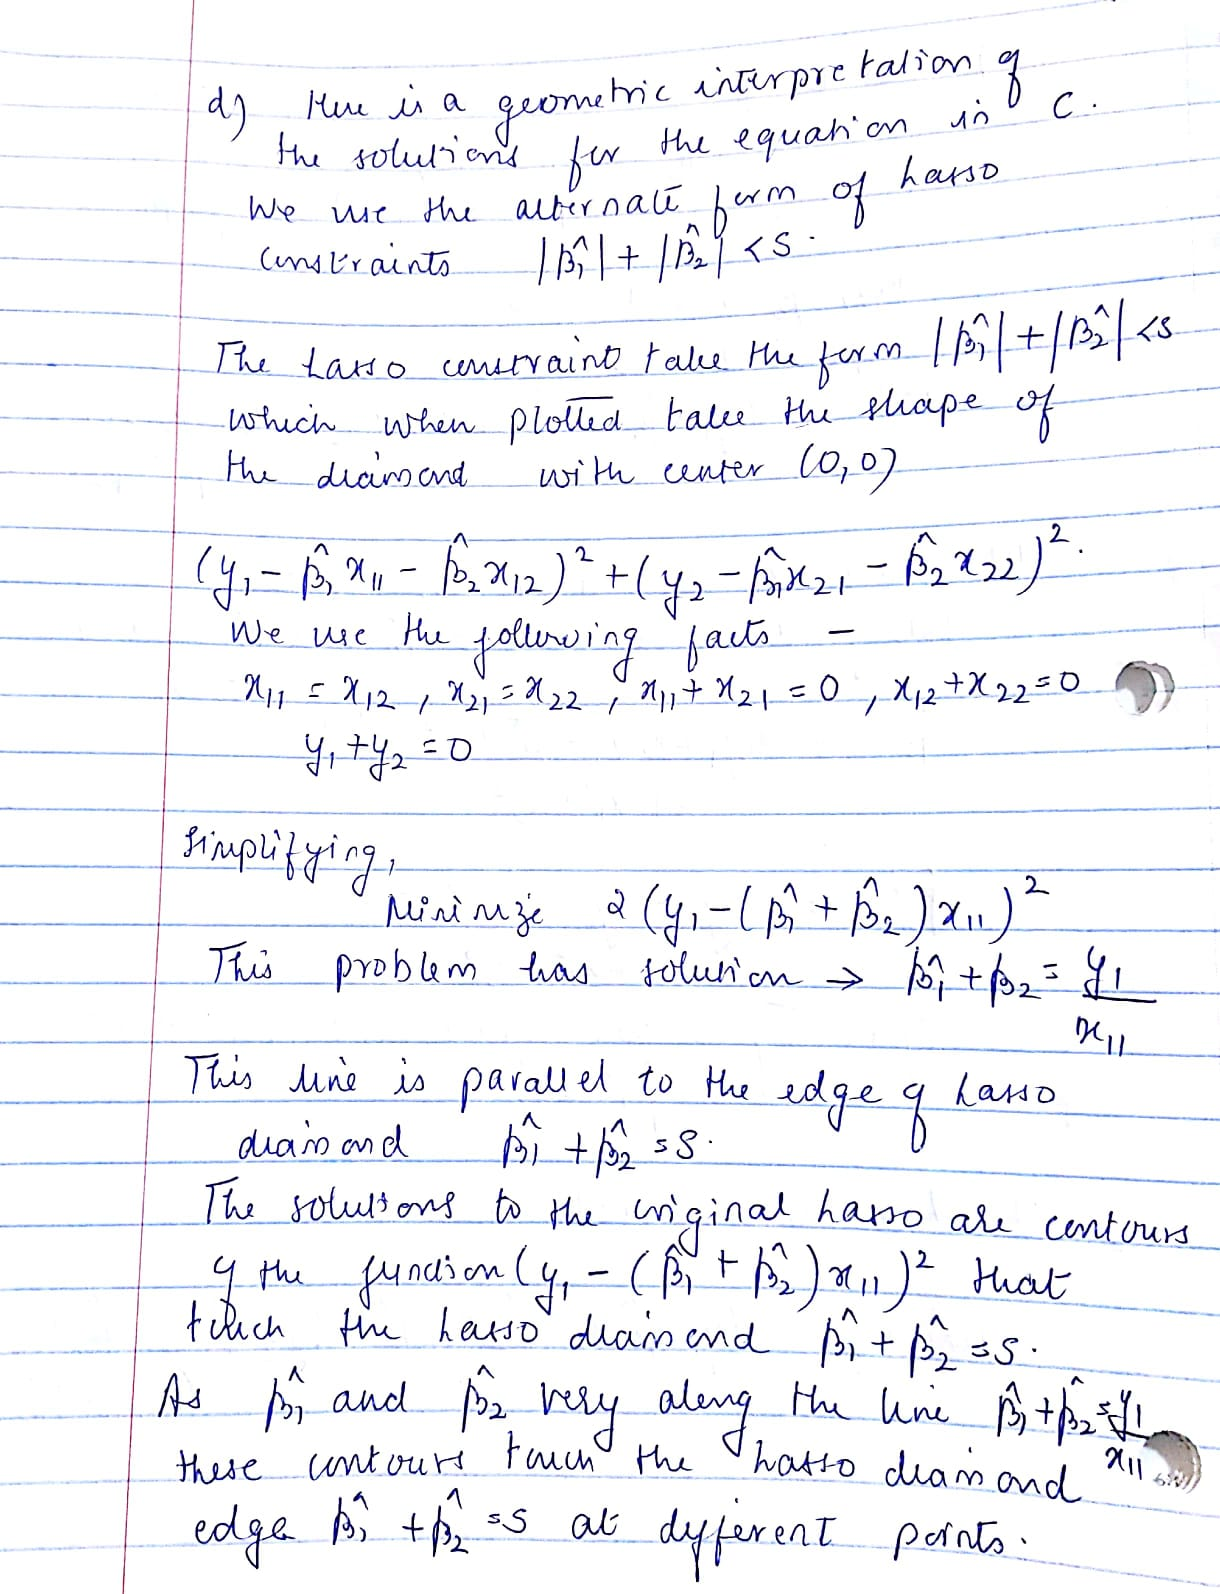

In [40]:

from IPython.display import Image
PATH = "./"
Image(filename = PATH +"2.jpeg", width=500, height=500)


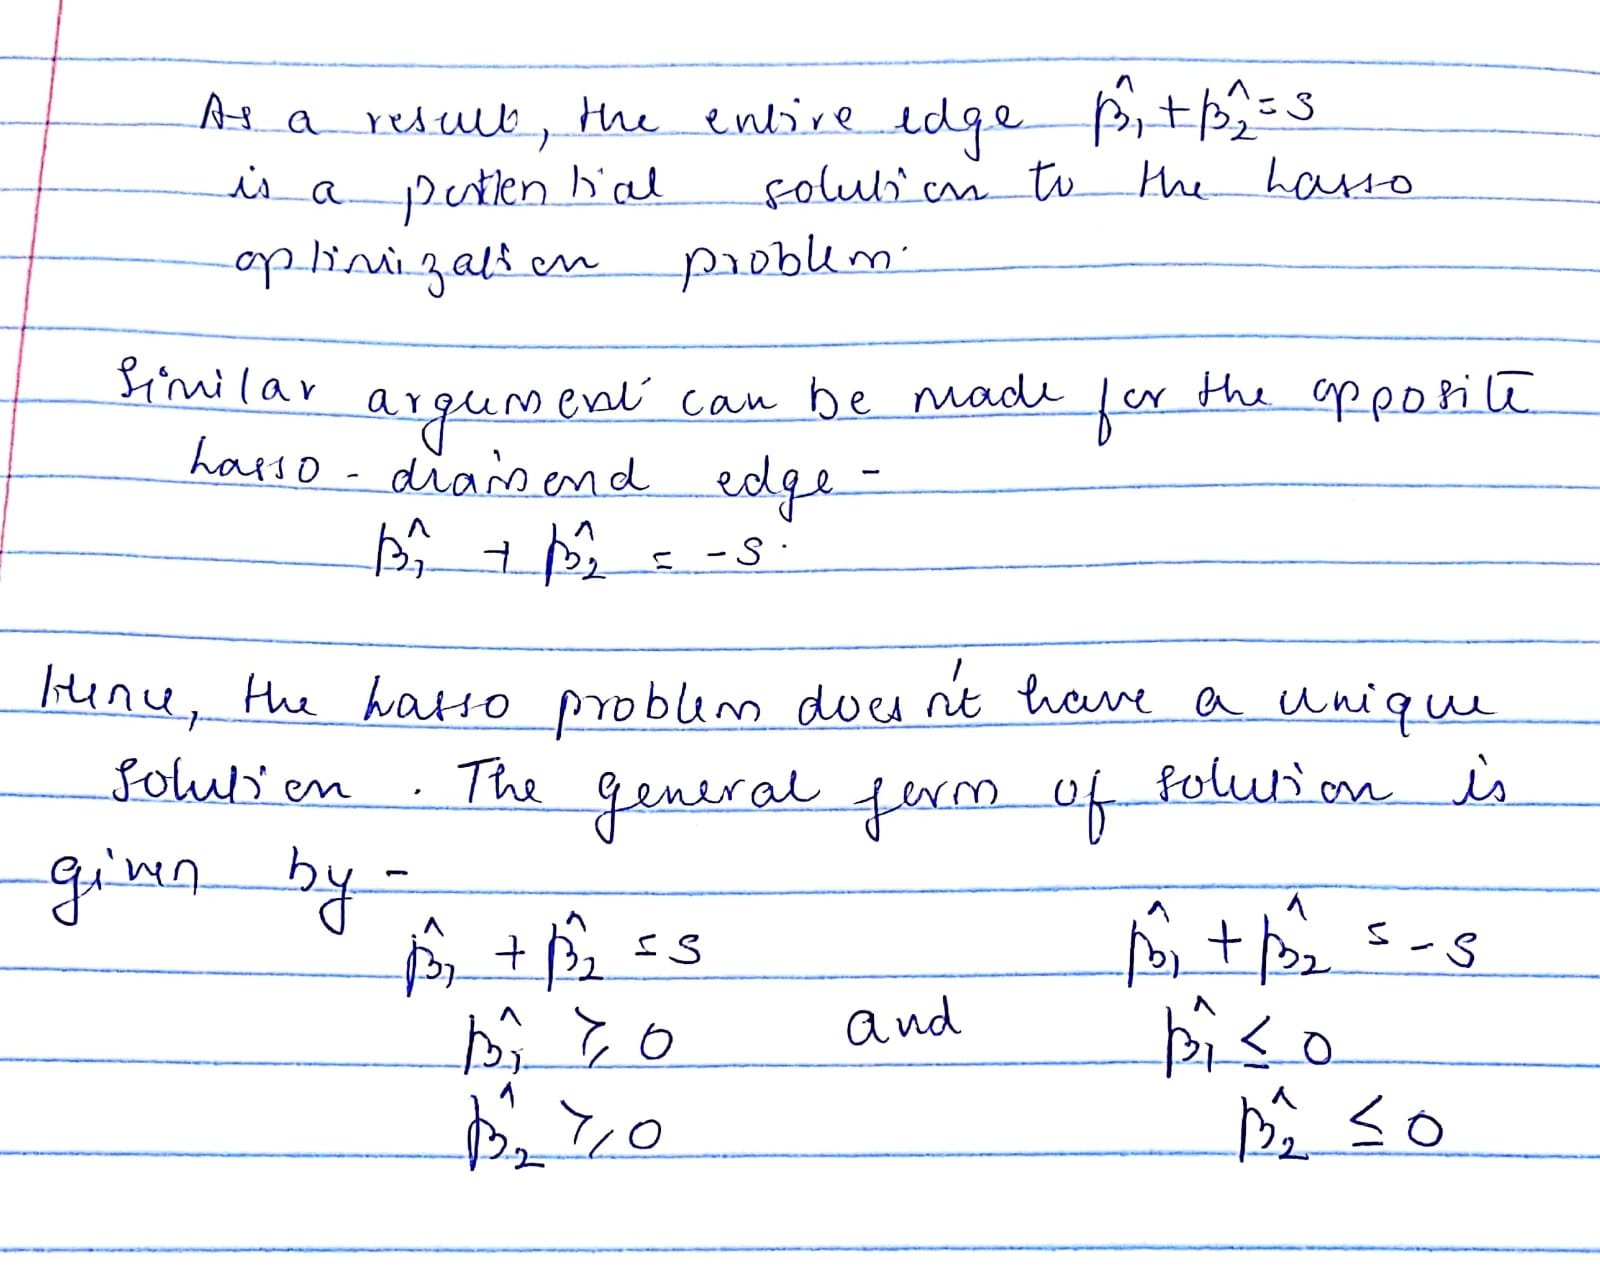

In [41]:

from IPython.display import Image
PATH = "./"
Image(filename = PATH +"3.jpeg", width=500, height=500)


ISLR 8.4.5



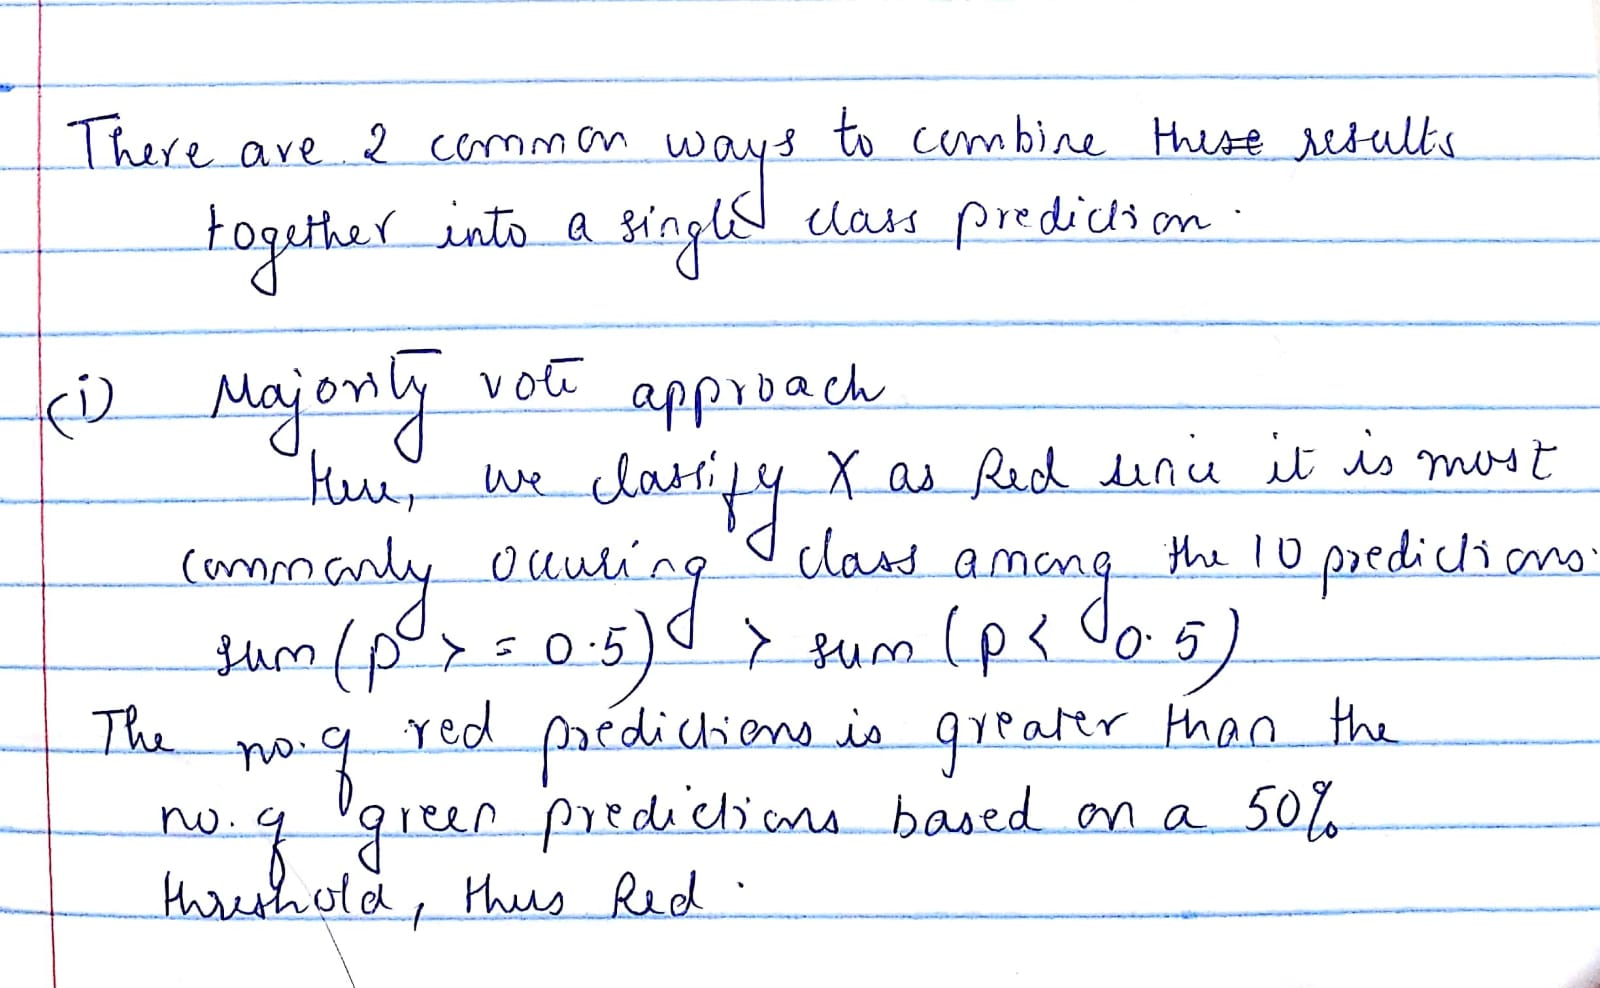

In [9]:

from IPython.display import Image
PATH = "./"
Image(filename = PATH +"ISLR 3.0.jpeg", width=500, height=500)


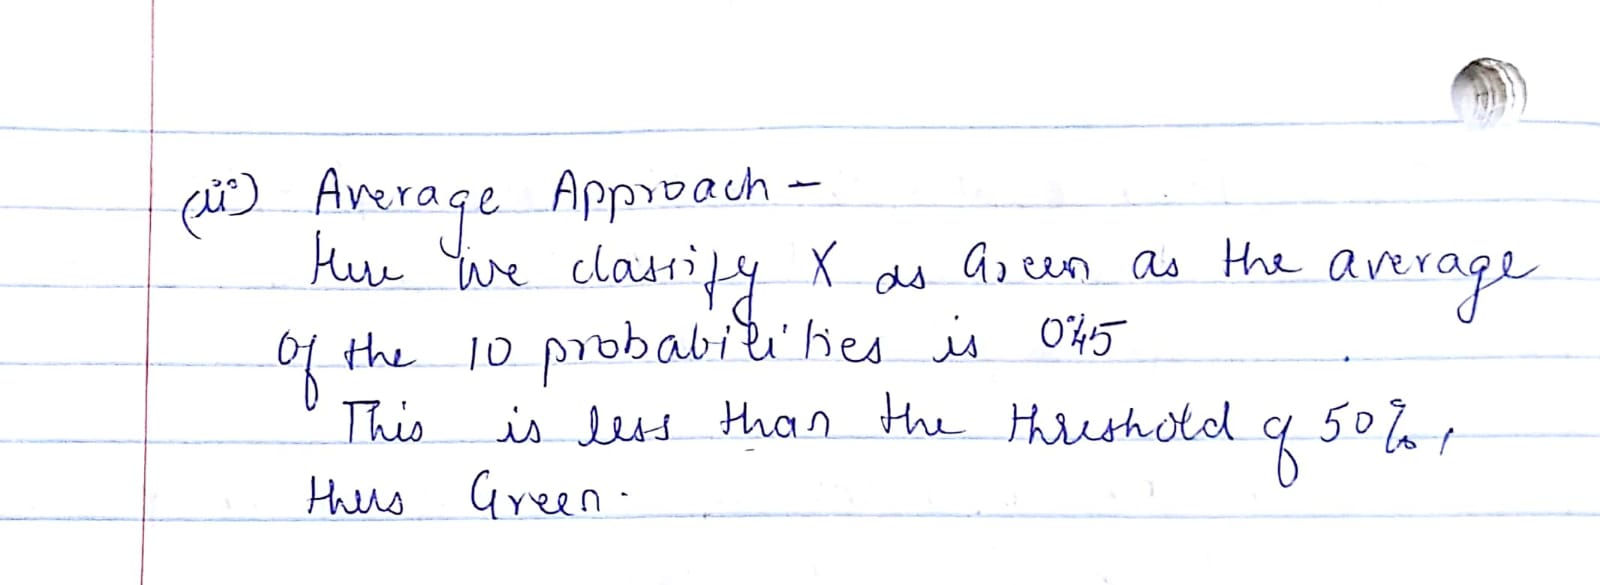

In [10]:

from IPython.display import Image
PATH = "./"
Image(filename = PATH +"ISLR 3.1.jpeg", width=500, height=500)


ISLR 9.7.3

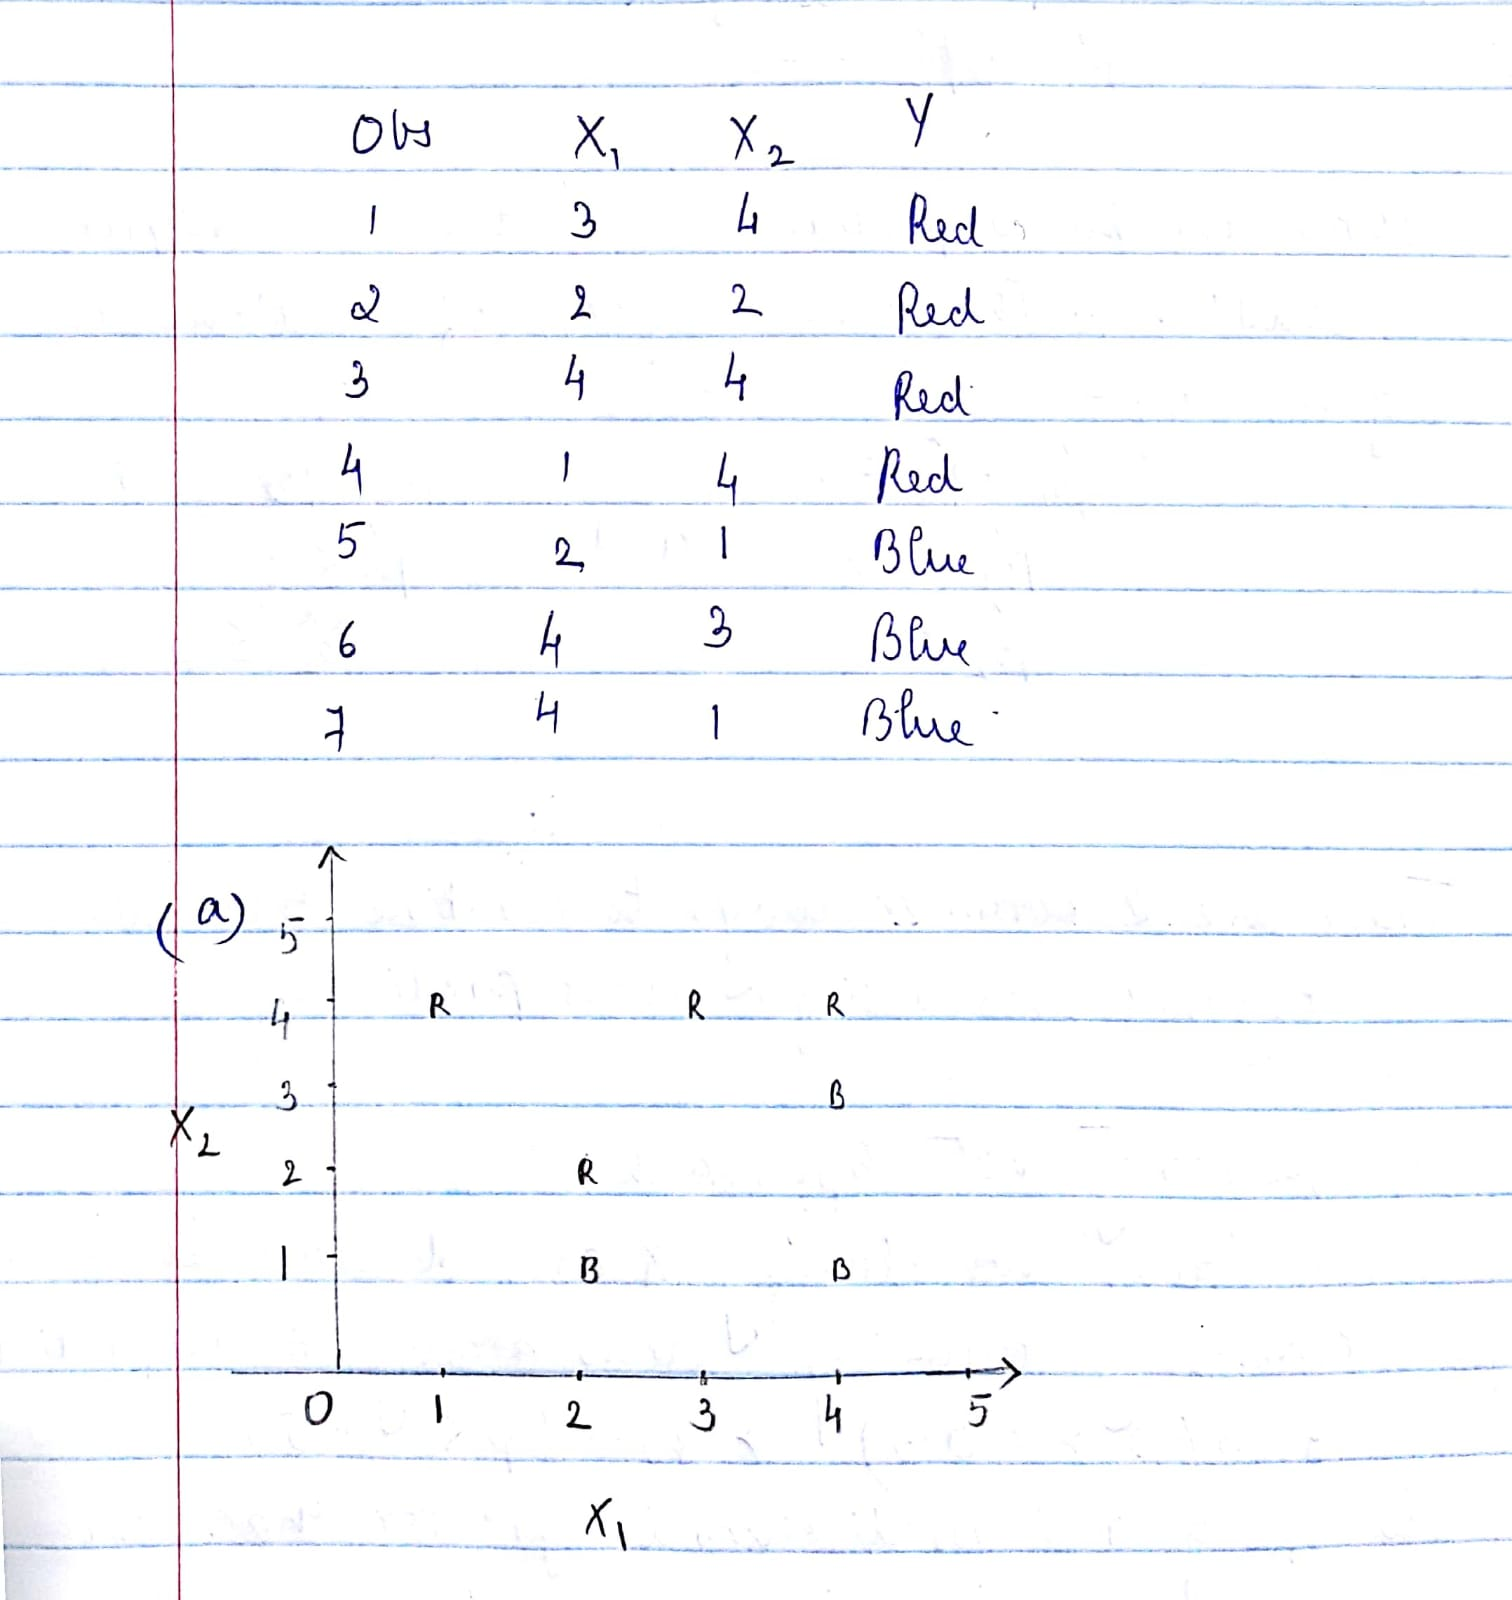

In [11]:

from IPython.display import Image
PATH = "./"
Image(filename = PATH +"ISLR 4.1.jpeg", width=500, height=500)


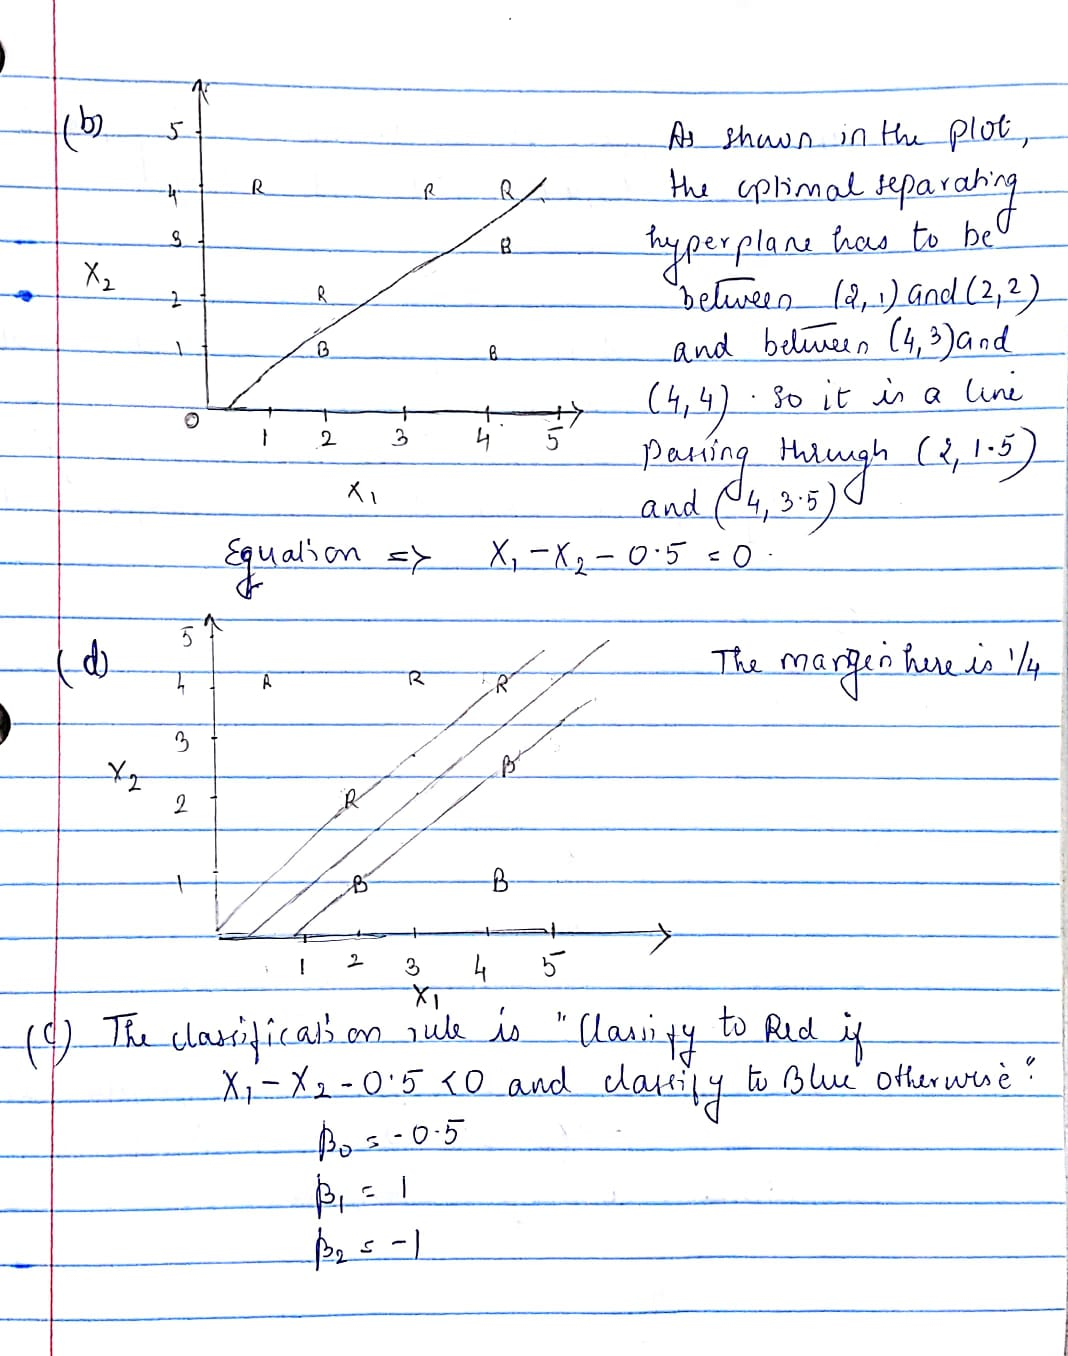

In [12]:

from IPython.display import Image
PATH = "./"
Image(filename = PATH +"ISLR 4.2.jpeg", width=500, height=500)


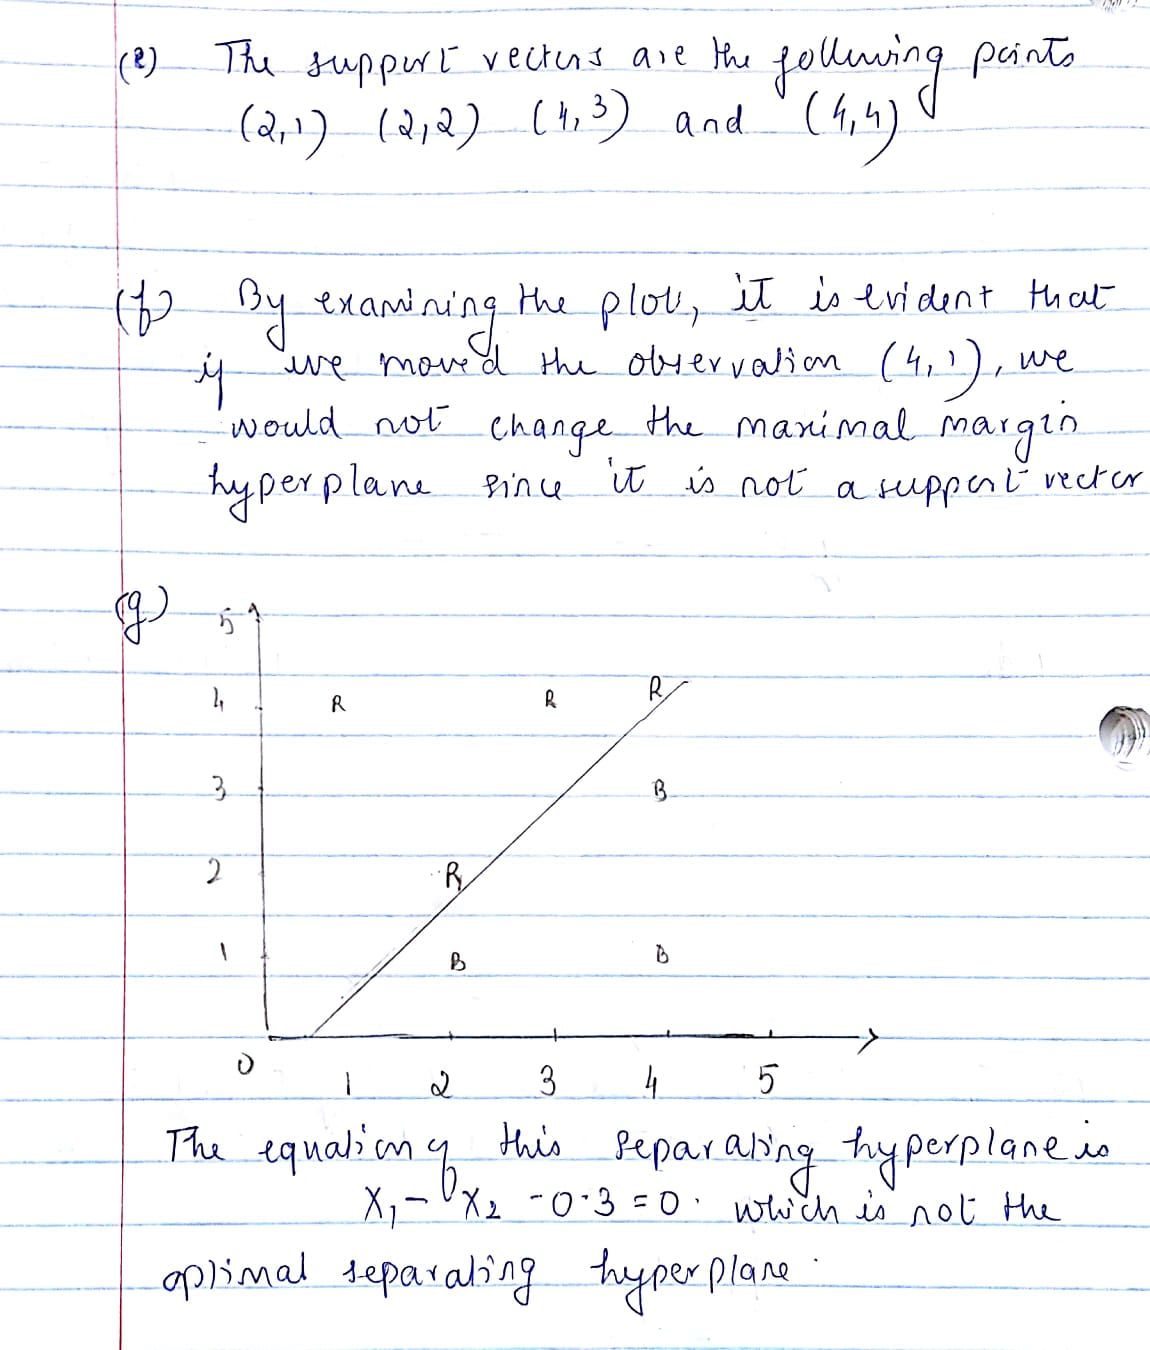

In [13]:

from IPython.display import Image
PATH = "./"
Image(filename = PATH +"ISLR 4.3.jpeg", width=500, height=500)


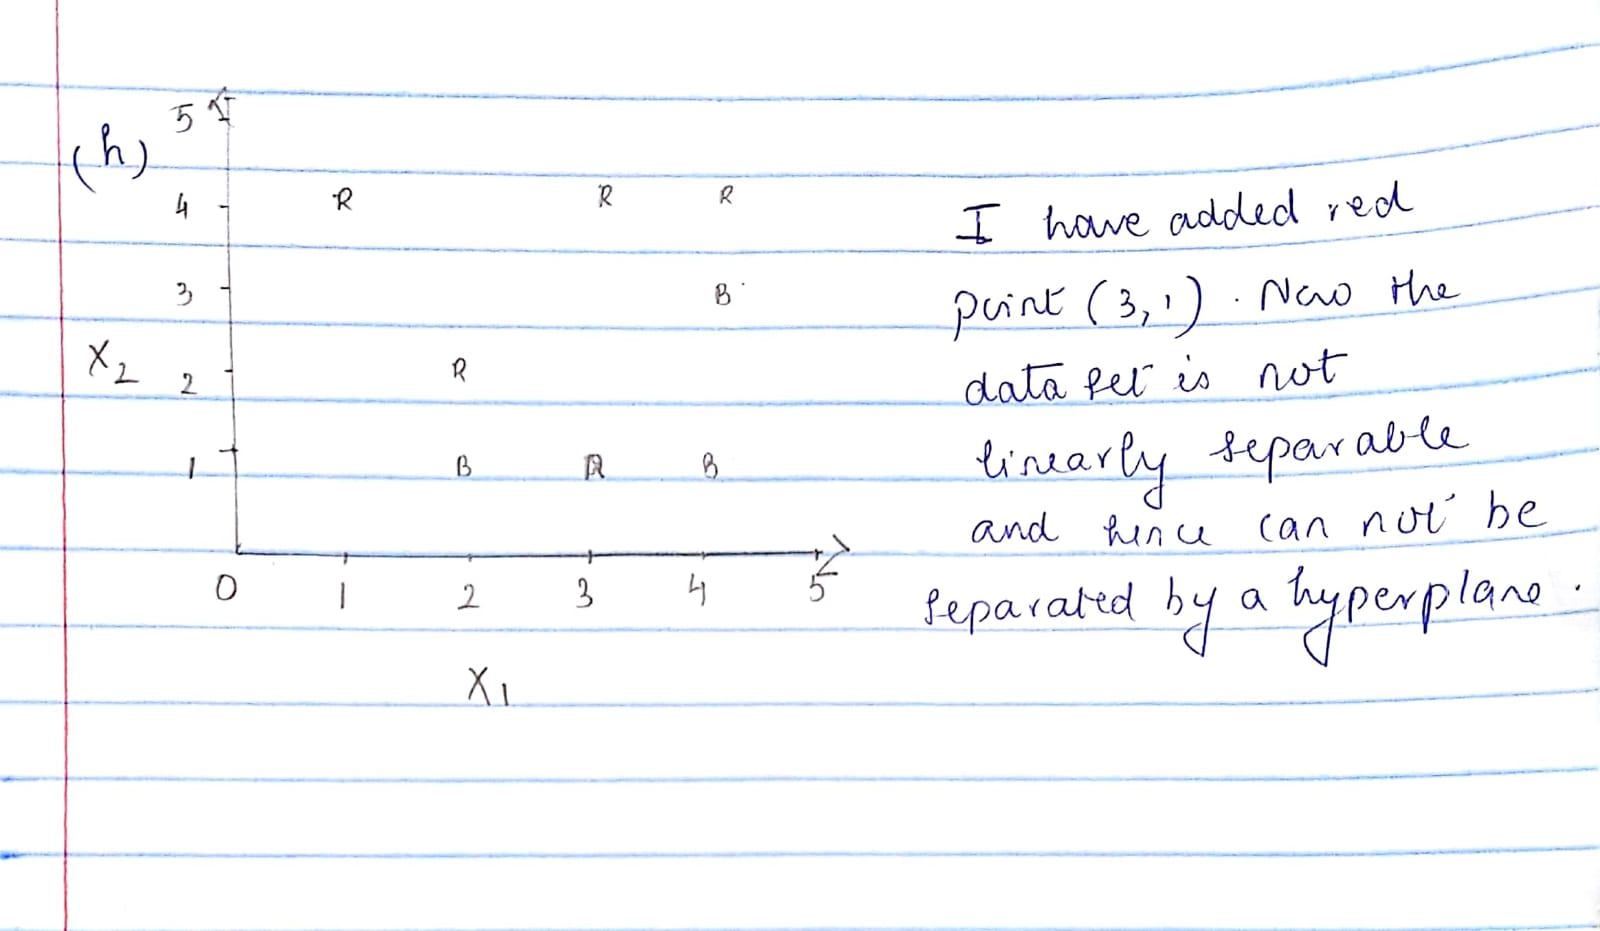

In [14]:

from IPython.display import Image
PATH = "./"
Image(filename = PATH +"ISLR 4.4.jpeg", width=500, height=500)
